In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

2021-12-09 09:17:14.350310: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-09 09:17:14.350326: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
# Loo at the data types of the veriables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#Get the shape of the arrays
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
#show the omage as a picture
index = 1
x_train[index]


array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

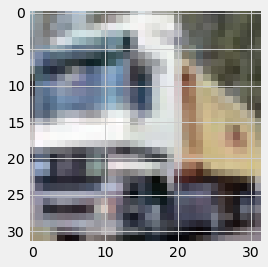

In [6]:
img = plt.imshow(x_train[index])

In [7]:
#Lets get a lable 
print(y_train[index])

[9]


In [8]:
#Get the image classification
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(classification[y_train[index][0]])

truck


In [9]:
#convert the labesl into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
#Lets print new labeles
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
#prnt the lable of the image/picture above
print(y_train_one_hot[index])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
#Normalize the pixels to be vaues between 0 and 1
x_train = x_train/225
x_test = x_test/225

In [13]:
x_train[index]

array([[[0.68444444, 0.78666667, 0.83111111],
        [0.56      , 0.60888889, 0.60444444],
        [0.46666667, 0.46222222, 0.42222222],
        ...,
        [0.40444444, 0.42222222, 0.31555556],
        [0.38666667, 0.4       , 0.31555556],
        [0.35111111, 0.36      , 0.31111111]],

       [[0.62222222, 0.71111111, 0.75111111],
        [0.64444444, 0.68      , 0.68444444],
        [0.55555556, 0.55555556, 0.52444444],
        ...,
        [0.42666667, 0.44      , 0.34666667],
        [0.34222222, 0.35555556, 0.27555556],
        [0.31555556, 0.32444444, 0.27111111]],

       [[0.62222222, 0.68888889, 0.72888889],
        [0.61777778, 0.64888889, 0.66222222],
        [0.51111111, 0.51111111, 0.49777778],
        ...,
        [0.35111111, 0.36444444, 0.28444444],
        [0.30222222, 0.31111111, 0.24444444],
        [0.29777778, 0.30666667, 0.24444444]],

       ...,

       [[0.77777778, 0.74222222, 0.73777778],
        [0.69333333, 0.68444444, 0.71111111],
        [0.68444444, 0

In [14]:
# ctreate the models architecture
model = Sequential()
#Add the first layer
model.add(Conv2D(32,(5,5),activation= 'relu',input_shape = (32,32,3)))
#Add a pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))
#Add another convolution layer
model.add(Conv2D(32,(5,5),activation= 'relu'))
#Add another pooling layer
model.add(MaxPooling2D(pool_size= (2,2)))
#add a flattening layer
model.add(Flatten())
#Add a layer withh 500 neorons
model.add(Dense(500,activation= 'relu'))
#Add a droput layer
model.add(Dropout(.5))
#Add a layer withh 250 neorons
model.add(Dense(250,activation= 'relu'))
#Add a layer withh 10 neorons
model.add(Dense(10,activation= 'softmax'))

2021-12-09 09:17:40.456517: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-09 09:17:40.456537: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-09 09:17:40.456554: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vlad-HP-Laptop-15s-fq2xxx): /proc/driver/nvidia/version does not exist
2021-12-09 09:17:40.456853: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
#Lets compile the model
model.compile(loss= 'categorical_crossentropy',
                optimizer= 'adam',
                metrics= ['accuracy'])

In [16]:
#Now lets train the model
hist = model.fit(x_train,y_train_one_hot,batch_size= 256,epochs=1,validation_split= 0.2)

157/157 [==============================] - 19s 121ms/step - loss: 1.7825 - accuracy: 0.3427 - val_loss: 1.4945 - val_accuracy: 0.4581


In [17]:
#Evaluate a model use the dataset
model.evaluate(x_test,y_test_one_hot)[1]

313/313 [==============================] - 2s 6ms/step - loss: 1.4801 - accuracy: 0.4601


0.460099995136261

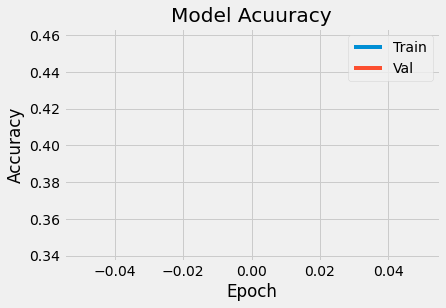

In [18]:
#Vixuslixe the model accur
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Acuuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

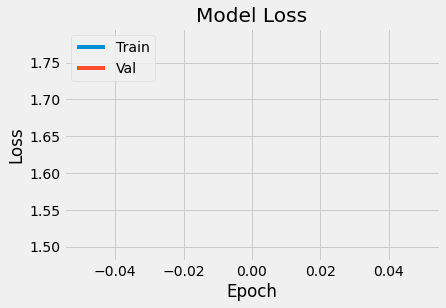

In [19]:
#Vizualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper left')
plt.show()

In [20]:
new_image = plt.imread('/media/vlad/Transcend/Microsoft VS Code/ready code/NNetworks/cat.jpg')

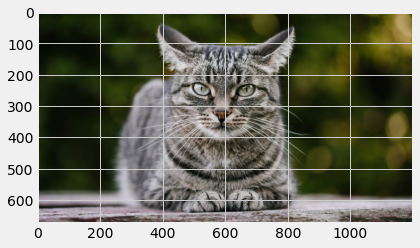

In [21]:
img = plt.imshow(new_image)

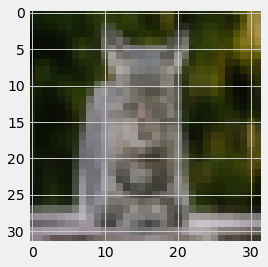

In [22]:
#In case if need to resize your image
from skimage.transform import resize
resize_image = resize(new_image,(32,32,3))
img = plt.imshow(resize_image)

In [23]:
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable


In [24]:
#Get the models prediction
predictions = model.predict(np.array([resize_image]))
#Show the predicts
predictions

array([[0.00311892, 0.00098139, 0.09267621, 0.24643038, 0.08664002,
        0.32836205, 0.18410176, 0.05501343, 0.00112632, 0.00154952]],
      dtype=float32)

In [25]:
#Sort the predictions from least to greates
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i]= list_index[j]
            list_index[j] = temp
#Show the list
print(list_index)

[5, 3, 6, 2, 4, 7, 0, 9, 8, 1]


In [26]:
#print the first 5 predictions
for i in range(5):
    print(classification[list_index[i]])

dog
cat
frog
bird
deer


In [27]:
#print the first 5 predictions
for i in range(5):
    print(classification[list_index[i]], ':',round(predictions[0][list_index[i]]*100,2),'%')

dog : 32.84 %
cat : 24.64 %
frog : 18.41 %
bird : 9.27 %
deer : 8.66 %
